In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sc.constants as cs
from sc import payoff as po
from yq.scripts import simulation as yqsm

print(pd.__version__)

2.1.2


In [2]:
paths_arr = yqsm.read_sim_data('gbm', '20231111_195045_022812', pd.Timestamp('2023-08-09'), pd.Timestamp('2023-08-15'))
print(paths_arr)

Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
Holidays in the calendar up to 2200: (numpy.datetime64('2200-04-04'), numpy.datetime64('2200-04-07'), numpy.datetime64('2200-05-01'), numpy.datetime64('2200-05-15'), numpy.datetime64('2200-05-26'), numpy.datetime64('2200-08-01'), numpy.datetime64('2200-12-24'), numpy.datetime64('2200-12-25'), numpy.datetime64('2200-12-26'), numpy.datetime64('2200-12-31'))
Total sims/length of sim_data_df for 2023-08-09 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-10 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-11 00:00:00: 100
Total sims/length of sim_data_df for 2023-08-14 00:00:00: 100
Total sims/length of sim_data_df for

In [3]:
#prep for single price path

df_sim = paths_arr[1][1]
df_sim = df_sim.rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'})

In [4]:
#po.pricing_single(df_sim)
first_sim_date = df_sim.first_valid_index()
df_historical = po.get_historical_assets(first_sim_date, cs.INITIAL_FIXING_DATE)
barrierHit = po.checkBarrier(df_historical)
df_payouts = po.payouts(df_sim, barrierHit)
price = po.rnv(df_payouts, df_historical.index[-1])
po.payouts(df_sim, False)

,Payout
Date,
2023-11-06,20.0
2024-02-05,20.0
2024-02-05,1000.0


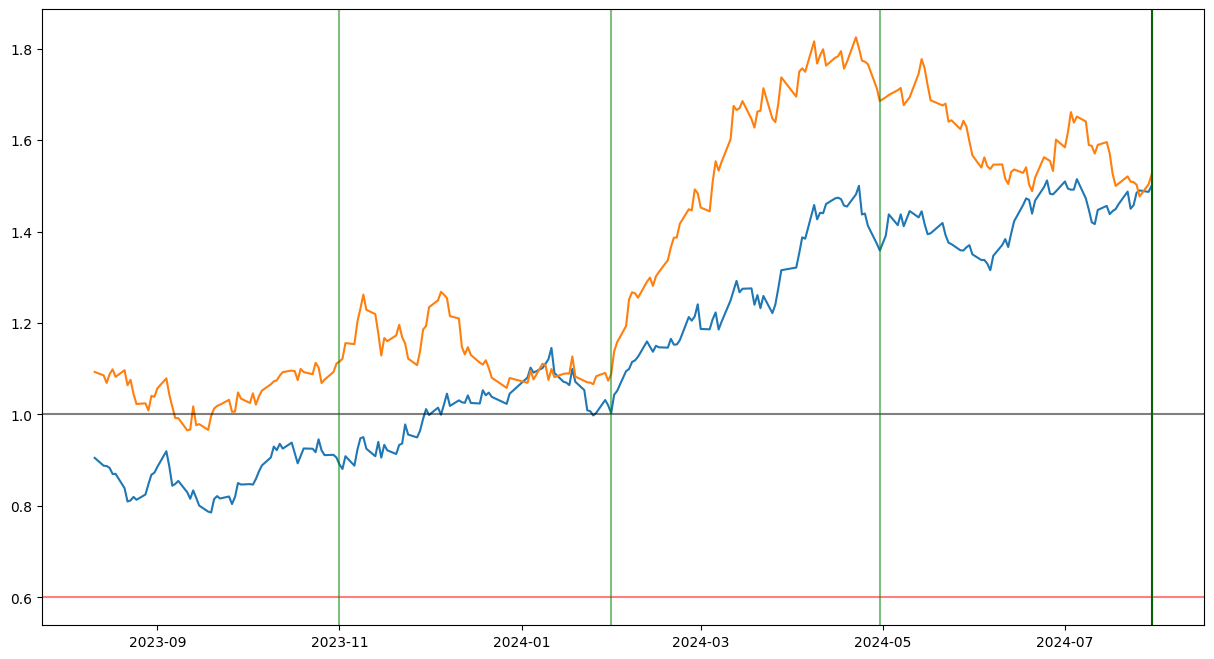

In [5]:
df_plot = df_sim.copy(deep = True)
for asset in cs.ASSET_NAMES:
    df_plot[asset] = df_plot[asset] / cs.INITIAL_LEVELS[asset]
plt.figure(figsize = (15, 8))
plt.plot(df_plot)
plt.axhline(y=1, c = "black", alpha = 0.5)
plt.axhline(y = 0.6, c = "red", alpha = 0.5)
plt.axvline(x = cs.FINAL_FIXING_DATE, c = "darkgreen")
for date in cs.EARLY_REDEMPTION_OBSERVATION_DATES:
    plt.axvline(x = date, c = "green", alpha = 0.5)

In [6]:
#multi path testing
df_sim_array = paths_arr[1]
print(df_sim_array[1])
for i in range(len(df_sim_array)):
    df_sim_array[i] = df_sim_array[i].rename(columns={'LONN.SW': 'LONN.SE', 'SIKA.SW': 'SIKA.SE'})


               LONN.SW     SIKA.SW
Date                              
2023-08-11  497.406187  262.778244
2023-08-14  487.977122  260.973142
2023-08-15  487.620680  256.978711
2023-08-16  485.331815  261.598729
2023-08-17  478.079893  264.146840
...                ...         ...
2024-07-24  801.267022  362.617305
2024-07-25  816.255134  361.264379
2024-07-26  819.029965  355.109383
2024-07-29  817.262709  361.408799
2024-07-30  824.291455  366.387528

[243 rows x 2 columns]


In [7]:
po.pricing_multiple(df_sim_array)

            Payout
Date              
2023-11-06    20.0
2024-02-05    20.0
2024-05-06    20.0
2024-08-05    20.0
2024-08-05  1000.0
[1080.0]
            Payout
Date              
2023-11-06    20.0
2024-02-05    20.0
2024-02-05  1000.0
[1080.0, 1040.0]
                Payout
Date                  
2023-11-06   20.000000
2024-02-05   20.000000
2024-05-06   20.000000
2024-08-05   20.000000
2024-08-05  179.862939
[1080.0, 1040.0, 259.8629386474726]
                Payout
Date                  
2023-11-06   20.000000
2024-02-05   20.000000
2024-05-06   20.000000
2024-08-05   20.000000
2024-08-05  252.263784
[1080.0, 1040.0, 259.8629386474726, 332.26378411701285]
            Payout
Date              
2023-11-06    20.0
2023-11-06  1000.0
[1080.0, 1040.0, 259.8629386474726, 332.26378411701285, 1020.0]
            Payout
Date              
2023-11-06    20.0
2024-02-05    20.0
2024-05-06    20.0
2024-08-05    20.0
2024-08-05  1000.0
[1080.0, 1040.0, 259.8629386474726, 332.26378411701285, 102

[1080.0,
 1040.0,
 259.8629386474726,
 332.26378411701285,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 209.379558559806,
 1060.0,
 1040.0,
 1020.0,
 262.4730119929497,
 1020.0,
 1080.0,
 1080.0,
 1080.0,
 1040.0,
 1080.0,
 1040.0,
 1040.0,
 1020.0,
 1080.0,
 1080.0,
 1040.0,
 1080.0,
 1040.0,
 1080.0,
 330.63114274687905,
 1060.0,
 1060.0,
 1060.0,
 1080.0,
 1080.0,
 1020.0,
 1040.0,
 335.0695655272077,
 1080.0,
 338.45550560418604,
 1080.0,
 298.23339838176355,
 1020.0,
 1080.0,
 1020.0,
 1080.0,
 1020.0,
 1020.0,
 1060.0,
 1020.0,
 323.1553211930887,
 1080.0,
 1080.0,
 254.65529692994303,
 1080.0,
 545.7804795865284,
 1020.0,
 205.56086628643874,
 1080.0,
 1060.0,
 1020.0,
 1020.0,
 1040.0,
 1080.0,
 1040.0,
 1020.0,
 1080.0,
 1080.0,
 1040.0,
 1040.0,
 1080.0,
 1080.0,
 1080.0,
 1080.0,
 1080.0,
 1020.0,
 1020.0,
 1020.0,
 1020.0,
 1080.0,
 307.7783936158131,
 1040.0,
 1080.0,
 1060.0,
 1060.0,
 206.7506401880671,
 1040.0,
 1060.0,
 314.5420351967332,
 235.97434051522748,